# Quantum Key Distribution E91 Protocol
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $



At the beginning of E91 protocol, Alice or a third party prepares EPR pairs:
$$\ket{\psi^-}=\frac{1}{\sqrt{2}}\big[\ket{01} - \ket{10}\big]$$

**Note:** There is no need to choose random bit sequence or encoding bases as we did in BB84. One of the properties of EPR pairs is a random outcome as a result of performed measurement.

For the measurements, our users use four bases: $Z$, $X$, $W$, $V$.

<b>Alice will choose between - $Z$, $X$, $W$.\
Bob will choose between - $Z$, $W$, $V$.</b>

<center>$ W=\frac{X+Z}{\sqrt{2}} \space , \space V=\frac{-X+Z}{\sqrt{2}}$</center>


They need to choose measurement basis for each qubit independently and randomly.

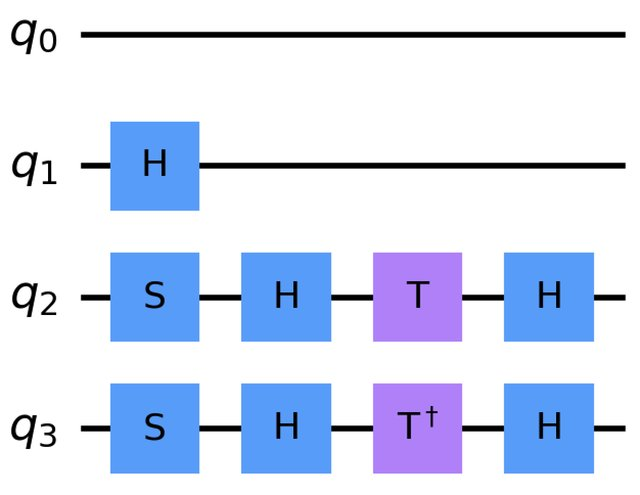

<h3>Step 1: Distributing quantum states</h3>

<ul>
    <li>Alice prepares 200 EPR pairs.
    <li>Alice keeps one qubit of EPR pair and sends second to Bob.
    <li>Aice randomly chooses measurement basis ($Z$,$X$ or $W$) and measures first qubit ('a').
    <li>Alice saves information about measurement basis that she used for each qubit.
    <li>Bob randomly chooses measurement basis ($Z$, $W$ or $V$) and measures second qubit ('b').
    <li>Bob saves information about measurement basis that he used for each qubit.

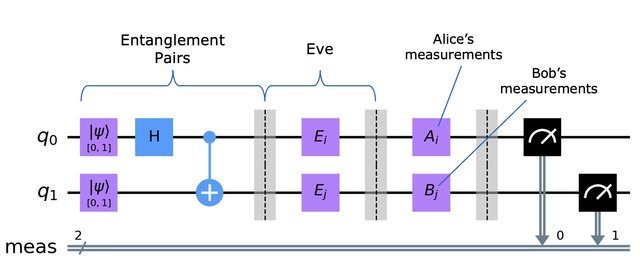

In [1]:
# Import all necessary objects and methods for quantum circuits
import cirq
from cirq import X,Y,Z,S,T,H,I,CX,measure
import matplotlib as plt
import numpy as np
from numpy import pi
from random import randrange, randint

In [2]:
# Define a function to prepare the Entangled Pair in the state |Psi minus>
def prepare_entanglement(circuit, a, b):
    circuit.append(X.on_each(a,b))
    circuit.append(H(a))
    circuit.append(CX(a,b))
    return circuit

In [3]:
# Alice circuit
# Alice chooses measurement basis

def alice_circuit(circuit):
    AliceChoice = randint(0,2)
    if AliceChoice == 0: # Measure in Z basis
        AliceBases.append("Z")
    elif AliceChoice == 1: # Measure in X basis
        circuit.append(H(a))
        AliceBases.append("X")
    elif AliceChoice == 2: # Measure in W basis
        circuit.append(S(a))
        circuit.append(H(a))
        circuit.append(T(a))
        circuit.append(H(a))
        AliceBases.append("W")
    return circuit

In [4]:
# Bob circuit
# Bob chooses measurement basis

def bob_circuit(circuit):
    BobChoice = randint(0,2)
    if BobChoice == 0: # Measure in Z basis
        BobBases.append("Z")
    elif BobChoice == 1: # Measure in W basis
        circuit.append(S(b))
        circuit.append(H(b))
        circuit.append(T(b))
        circuit.append(H(b))
        BobBases.append("W")
    elif BobChoice == 2: # Measure in V basis
        circuit.append(S(b))
        circuit.append(H(b))
        circuit.append(T(b)**-1)
        circuit.append(H(b))
        BobBases.append("V")
    return circuit

In [5]:
# Registers for measurement bases and keys
AliceBases, AliceKey = [], []
BobBases, BobKey = [], []

# Create a Quantum Ciruit of 2 Qubits
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
circuit = cirq.Circuit()

# Apply the entanglement
prepare_entanglement(circuit, a, b)

# Apply Alice measurement circuit
alice_circuit(circuit)
# Apply Bob measurement circuit
bob_circuit(circuit)

display(circuit)
print("AliceBases =", AliceBases,'\n',"BobBases =", BobBases)

a: ───X───H───@───H───
              │
b: ───X───────X───────

AliceBases = ['X'] 
 BobBases = ['Z']


In [6]:
# Registers for measurement bases and keys
AliceBases, AliceKey = [], []
BobBases, BobKey = [], []

for i in range(200):
    # Create a Quantum Ciruit of 2 Qubits
    a = cirq.NamedQubit("a")
    b = cirq.NamedQubit("b")
    circuit = cirq.Circuit()

    # Apply the entanglement
    prepare_entanglement(circuit, a, b)

    # Apply Alice measurement circuit
    alice_circuit(circuit)
    
    # Apply Bob measurement circuit
    bob_circuit(circuit)
    
    # Apply the final measurement
    circuit.append(measure(a, key='a'))
    circuit.append(measure(b, key='b'))
    
    # Run the simulator and get the results
    simulator = cirq.Simulator()
    
    samples = simulator.run(circuit)
    
    alicecounts = samples.histogram(key="a")
    bobcounts = samples.histogram(key="b")

    # Saving results
    aliceresults = list(alicecounts.keys())
    bobresults = list(bobcounts.keys())
    AliceKey.append(aliceresults)
    BobKey.append(bobresults)
    
display(circuit)
print("AliceBases =", AliceBases,'\n',"BobBases =", BobBases)
print('AliceKey',AliceKey)

print('BobKey',BobKey)

a: ───X───H───@───S───H───T───H───M───
              │
b: ───X───────X───M───────────────────

AliceBases = ['X', 'W', 'X', 'X', 'W', 'W', 'X', 'W', 'X', 'X', 'Z', 'X', 'W', 'Z', 'X', 'X', 'Z', 'Z', 'W', 'W', 'X', 'X', 'X', 'X', 'W', 'Z', 'Z', 'W', 'X', 'W', 'X', 'W', 'Z', 'X', 'X', 'W', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'X', 'W', 'W', 'X', 'W', 'W', 'Z', 'X', 'W', 'Z', 'W', 'X', 'W', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'W', 'W', 'Z', 'Z', 'W', 'Z', 'Z', 'W', 'W', 'X', 'X', 'X', 'W', 'Z', 'W', 'X', 'Z', 'X', 'X', 'Z', 'W', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'W', 'Z', 'W', 'W', 'Z', 'W', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'W', 'Z', 'W', 'Z', 'Z', 'X', 'W', 'W', 'W', 'W', 'Z', 'W', 'X', 'X', 'Z', 'X', 'W', 'W', 'X', 'W', 'X', 'W', 'W', 'W', 'W', 'W', 'W', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'W', 'Z', 'X', 'Z', 'W', 'X', 'W', 'X', 'Z', 'W', 'Z', 'W', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'W', 'X', 'W', 'W', 'W', 'W', 'X', 'X', 'W', 'Z', 'W', 'X', 'Z', 'Z', 'X', 'W', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'W', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'W', 'W', 'X', 'Z', 'W', 'W', 'W', 'Z', 'X', '

<h3>Step 2: Sifting</h3>

Implementing sifting phase.\
Alice and Bob compare bases.\
If they used same measurement bases, they save corresponding bits to their final key strings.\
If bases mismatch, they keep corresponding bits and information about basis they used in separate registers.

In [7]:
finalKeyAlice, finalKeyBob = [], []    # for matched measurement bases
diffAlice, diffBob = [], []            # for mismatched measurement bases
diffBasesAlice, diffBasesBob = [], []  # bases of mismateched rounds

for i in range(0, len(AliceBases)):
    if AliceBases[i] == BobBases[i]:   # When used same bases
        finalKeyAlice.append(AliceKey[i])
        finalKeyBob.append(BobKey[i])
    else:
        diffAlice.append(AliceKey[i])
        diffBob.append(BobKey[i])
        diffBasesAlice.append(AliceBases[i])
        diffBasesBob.append(BobBases[i])

print('finalKeyAlice', finalKeyAlice, '\n', 'finalKeyBob', finalKeyBob, '\n')

print('diffAlice', diffAlice, '\n', 'diffBob', diffBob, '\n')
print('diffBasesAlice',  diffBasesAlice, '\n','diffBasesBob', diffBasesBob, '\n')



finalKeyAlice [[1], [0], [1], [1], [0], [0], [1], [0], [0], [1], [0], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [1], [1], [0], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1]] 
 finalKeyBob [[0], [1], [0], [0], [1], [1], [0], [1], [1], [0], [1], [1], [1], [0], [0], [1], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [0], [1], [1], [0], [0], [0], [0], [1], [1], [0], [0], [1], [1], [1], [0], [0], [0], [0]] 

diffAlice [[0], [0], [0], [0], [0], [1], [1], [1], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [1], [0], [1], [1], [1], [0], [1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [1], [1], [0], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [1], [1], [1], [1

### Final step
As Alice and Bob use: $$\ket{\psi^-}=\frac{1}{\sqrt{2}}\big[\ket{01} - \ket{10}\big]$$
as an entanglement state between them, one of them must reverse his key bits, Bob will do this.\
And they will use Alice key bits as a final key:

In [8]:
finalKey = []
for i in range(0, len(finalKeyBob)):
    if finalKeyBob[i] == [0]:
        finalKey.append(1)
    elif finalKeyBob[i] == [1]:
        finalKey.append(0)

print("Final sifted key:", finalKey, " of length", len(finalKey),'.')

Final sifted key: [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]  of length 44 .


***
<h3>CHSH inequality violation test</h3>

Calculate correlation values and $S$

In [9]:
#ZW
sameZW = 0
diffZW = 0
for i, (bA, bB) in enumerate(zip(diffBasesAlice, diffBasesBob)):
    if (bA == 'Z' and bB == 'W'):
        if diffAlice[i]==diffBob[i]:
            sameZW=sameZW+1
        else:
            diffZW=diffZW+1

totalZW=sameZW+diffZW
if totalZW!=0:
    ZW=(sameZW-diffZW)/totalZW
else:
    ZW=0

In [10]:
#XW
sameXW = 0
diffXW = 0
for i, (bA, bB) in enumerate(zip(diffBasesAlice, diffBasesBob)):
    if (bA == 'X' and bB == 'W'):
        if diffAlice[i]==diffBob[i]:
            sameXW=sameXW+1
        else:
            diffXW=diffXW+1

totalXW=sameXW+diffXW
if totalXW!=0:
    XW=(sameXW-diffXW)/totalXW
else:
    XW=0

In [11]:
#XV
sameXV = 0
diffXV = 0
for i, (bA, bB) in enumerate(zip(diffBasesAlice, diffBasesBob)):
    if (bA == 'X' and bB == 'V'):
        if diffAlice[i]==diffBob[i]:
            sameXV=sameXV+1
        else:
            diffXV=diffXV+1

totalXV=sameXV+diffXV
if totalXV!=0:
    XV=(sameXV-diffXV)/totalXV
else:
    XV=0

In [12]:
#ZV
sameZV = 0
diffZV = 0
for i, (bA, bB) in enumerate(zip(diffBasesAlice, diffBasesBob)):
    if (bA == 'Z' and bB == 'V'):
        if diffAlice[i]==diffBob[i]:
            sameZV=sameZV+1
        else:
            diffZV=diffZV+1

totalZV=sameZV+diffZV
if totalZV!=0:
    ZV=(sameZV-diffZV)/totalZV

else:
    ZV=0

In [13]:
S=ZW+XW-XV+ZV

print("CHSH inequality value is", S)

CHSH inequality value is -2.453030303030303


Maximally entangled photons would result in $S= ± 2\sqrt{2}$.

If this were not the case, then Alice and Bob can conclude Eve has introduced errors to the system. 

If $S$ value corresponds to quantum system, Alice and Bob can use bits from matching round as a secret key!

***